

# Contrastive Learning with SimCLR Model and InfoCNE Loss



In [11]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


In [13]:
# Define the classes we are interested in
target_classes = ['dog', 'cat', 'ship', 'truck']

# Define a basic transformation to convert to Tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the full CIFAR-10 training set
full_train_dataset = datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transform)

# Get the indices for the target classes
class_to_idx = full_train_dataset.class_to_idx
target_indices = [class_to_idx[cls] for cls in target_classes]

print(f"target_indices: {target_indices}")

target_indices: [5, 3, 8, 9]


In [14]:
# Create a subset containing only the target classes
train_indices = np.where(np.isin(full_train_dataset.targets, target_indices))[0]
trimmed_train_dataset = torch.utils.data.Subset(full_train_dataset, train_indices)

# Create a DataLoader for easy iteration
trimmed_train_loader = torch.utils.data.DataLoader(trimmed_train_dataset, batch_size=16, shuffle=True)

In [15]:
# Function to show a batch of images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [16]:
# Get one batch of data
dataiter = iter(trimmed_train_loader)
images, labels = next(dataiter)

print("One batch of data:")
print(f"images: {images.shape}")
print(f"labels: {labels.shape}")

One batch of data:
images: torch.Size([16, 3, 32, 32])
labels: torch.Size([16])


Sample labels: ['ship', 'truck', 'ship', 'ship', 'ship', 'ship', 'truck', 'ship', 'dog', 'truck', 'cat', 'dog', 'truck', 'ship', 'dog', 'cat']


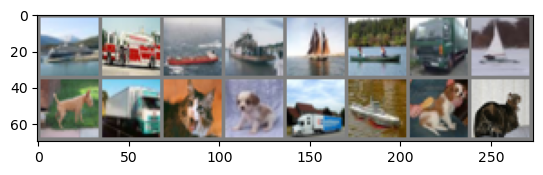

In [17]:
# Get the class names corresponding to the labels
class_names = {v: k for k, v in full_train_dataset.class_to_idx.items()}
label_names = [class_names[label.item()] for label in labels]
print("Sample labels:", label_names)
imshow(torchvision.utils.make_grid(images))

SimCLR pre-training data loader created for classes: ['dog', 'cat', 'ship', 'truck'] from ./data/cifar10
View 1 batch shape: torch.Size([32, 3, 32, 32])
View 2 batch shape: torch.Size([32, 3, 32, 32])


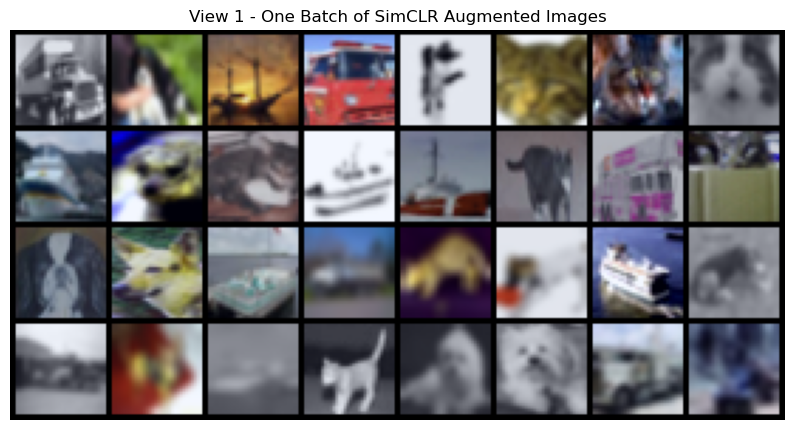

In [18]:
# 1. Import libraries
import matplotlib.pyplot as plt
import torchvision
import torch

# 2. Import your data loader function
from src.data_loading import get_simclr_data_loaders

# 3. Create the dataloader
train_loader_simclr = get_simclr_data_loaders(batch_size=32)

# 4. Fetch one batch
(two_views_batch, _labels) = next(iter(train_loader_simclr))

# 5. Split into view1 and view2
view1_batch, view2_batch = two_views_batch  # <-- unpacking!

# 6. Check the shapes
print(f"View 1 batch shape: {view1_batch.shape}")  # [32, 3, 32, 32]
print(f"View 2 batch shape: {view2_batch.shape}")

# 7. Visualize images from view 1
img_grid = torchvision.utils.make_grid(view1_batch, nrow=8, normalize=True)

plt.figure(figsize=(10, 10))
plt.imshow(img_grid.permute(1, 2, 0))  # (C, H, W) -> (H, W, C)
plt.axis('off')
plt.title('View 1 - One Batch of SimCLR Augmented Images')
plt.savefig('one_batch_of_aug_images.png')
plt.show()


# Run Contrastive Learning trainer

In [20]:
!python -m src.semi_supervised_trainer

Random seed set to 42
SimCLR pre-training data loader created for classes: ['dog', 'cat', 'ship', 'truck'] from ./data/cifar10
/home/hice1/wjeng7/.conda/envs/final-proj-cs7643/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hice1/wjeng7/.conda/envs/final-proj-cs7643/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Epoch 1/40: 100%|███████████████████████████████| 78/78 [00:10<00:00,  7.36it/s]
Epoch 1, Average Loss: 5.4219
Checkpoint saved to ./checkpoints/simclr_checkpoint_epoch_1.pth
Epoch 2/40: 100%|███████████████████████████████| 78/78 [00:09<00:00,  8.58it/s]
Epoch 2, Average Loss: 4.2671
Ch

Loaded loss data for 100 epochs.


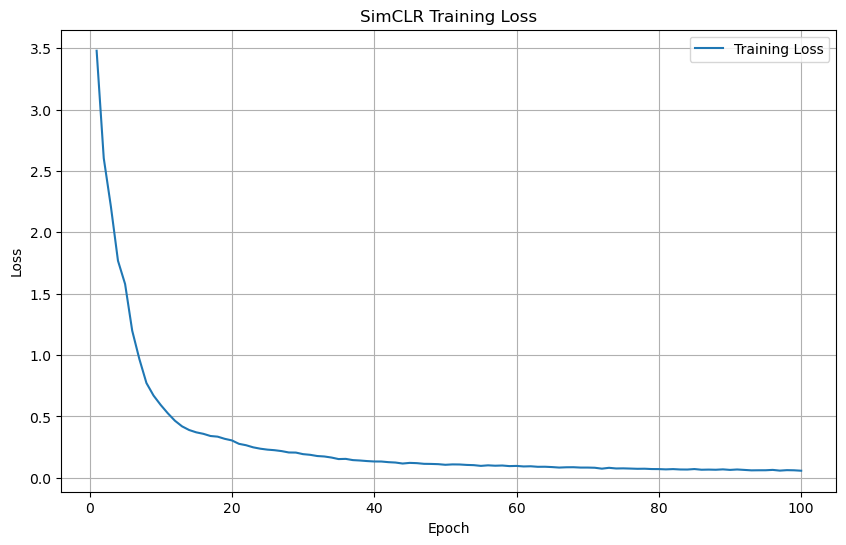

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Load the loss data from the saved file
loss_data_path = 'simclr_loss_data.npy'  # Make sure this path matches where you saved it
try:
    train_losses = np.load(loss_data_path)
    epochs = len(train_losses)
    print(f"Loaded loss data for {epochs} epochs.")

    # Plot the loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('SimCLR Training Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig('imCLR Training Loss.png')
    plt.show()

except FileNotFoundError:
    print(f"Error: Loss data file not found at {loss_data_path}. Make sure you ran the training script first.")
except Exception as e:
    print(f"An error occurred while loading the loss data: {e}")

In [62]:
!python -m src.linear_evaluation

/home/hice1/wjeng7/.conda/envs/final-proj-cs7643/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hice1/wjeng7/.conda/envs/final-proj-cs7643/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loaded training data for classes: ['dog', 'cat', 'ship', 'truck'] from ./data/cifar10
Loaded testing data for classes: ['dog', 'cat', 'ship', 'truck'] from ./data/cifar10
n_features: 2048
Linear Eval Epoch 1/30: 100%|████████████████| 313/313 [00:01<00:00, 159.13it/s]
Linear Eval Epoch 1, Loss: 0.8134, Train Accuracy: 65.34%
Linear Eval Epoch 2/30: 100%|████████████████| 313/313 [00:01<00:00, 207.76it/s]
Linear 

# Plot Linear Evaluation

In [63]:
# Load the saved data
train_accuracies = np.load('linear_eval_train_accuracies.npy')
test_accuracies = np.load('linear_eval_test_accuracies.npy')
# train_losses = np.load('linear_eval_train_losses.npy')
epochs = len(train_accuracies)

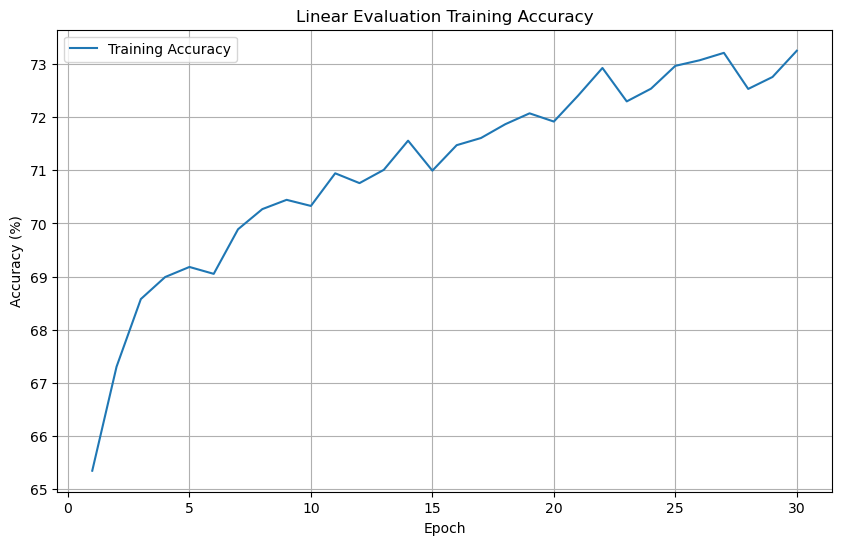

In [65]:
# Plotting training accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Linear Evaluation Training Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('linear_eval_training_accuracy.png')
plt.show()

# Inspect augmented images from data loader

In [67]:
!python -m src.semi_supervised_trainer

Random seed set to 42
SimCLR pre-training data loader created for classes: ['dog', 'cat', 'ship', 'truck'] from ./data/cifar10
/home/hice1/wjeng7/.conda/envs/final-proj-cs7643/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hice1/wjeng7/.conda/envs/final-proj-cs7643/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Epoch 1/100: 100%|████████████████████████████| 156/156 [00:08<00:00, 17.86it/s]
Epoch 1, Average Loss: 3.3574
Checkpoint saved to ./checkpoints/simclr_checkpoint_epoch_1.pth
Epoch 2/100: 100%|████████████████████████████| 156/156 [00:08<00:00, 18.81it/s]
Epoch 2, Average Loss: 3.0355
Ch